## First look at along-track sythetic data from IMHOTEP simulations

In [1]:
## standart libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# time
import datetime
import netCDF4

# plot
import cartopy.crs as ccrs
import cartopy.feature as ccf
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#from jdcal import gcal2jd, jd2gcal

# for jupyter notebook display
%matplotlib inline

## define some fonctions for plotting

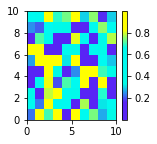

In [37]:
def make_cmap(colors, position=None, bit=False):
    '''
    make_cmap takes a list of tuples which contain RGB values. The RGB
    values may either be in 8-bit [0 to 255] (in which bit must be set to
    True when called) or arithmetic [0 to 1] (default). make_cmap returns
    a cmap with equally spaced colors.
    Arrange your tuples so that the first color is the lowest value for the
    colorbar and the last is the highest.
    position contains values from 0 to 1 to dictate the location of each color.
    '''
    import matplotlib as mpl
    import numpy as np
    bit_rgb = np.linspace(0,1,256)
    if position == None:
        position = np.linspace(0,1,len(colors))
    else:
        if len(position) != len(colors):
            sys.exit("position length must be the same as colors")
        elif position[0] != 0 or position[-1] != 1:
            sys.exit("position must start with 0 and end with 1")
    if bit:
        for i in range(len(colors)):
            colors[i] = (bit_rgb[colors[i][0]],
                         bit_rgb[colors[i][1]],
                         bit_rgb[colors[i][2]])
    cdict = {'red':[], 'green':[], 'blue':[]}
    for pos, color in zip(position, colors):
        cdict['red'].append((pos, color[0], color[0]))
        cdict['green'].append((pos, color[1], color[1]))
        cdict['blue'].append((pos, color[2], color[2]))

    cmap = mpl.colors.LinearSegmentedColormap('my_colormap',cdict,256)
    return cmap

def plotmapSCATT(fig1,ehonan,nav_lon,nav_lat,qcflag,cm_base,vmin,vmax,Nincr,plto,glo=True,obsflag=100,coastL=False,coastC=False,xlim=(0,10),ylim=(0,10),su='b',so='k',loncentr=0.,outonly=False, inonly=False):
        '''
        
        Plot regional or global map of scatter data (point by point data).
        Uses Cartopy.
        Parameters: (...to be done...)

        '''
        
        ## imports
        import os,sys
        import numpy as np

        # xarray
        import xarray as xr

        # plot
        import cartopy.crs as ccrs
        import cartopy.feature as ccf
        import matplotlib.pyplot as plt
        from matplotlib.colors import Colormap
        import matplotlib.colors as mcolors
        import matplotlib.dates as mdates
        import matplotlib.cm as cm
        import matplotlib.dates as mdates
        import matplotlib.ticker as mticker
        
        # Colormap & levels
        cmap = plt.get_cmap(cm_base)
        cmap.set_under(su,1.)
        cmap.set_over(so,1.) 
        levels = mticker.MaxNLocator(nbins=Nincr).tick_values(vmin, vmax)
        norm   = mcolors.BoundaryNorm(levels, ncolors=cmap.N)
        
        # Projection
        
        trdata  = ccrs.PlateCarree() 
        # Note: if data points are given in classical lat lon coordinates this should
        #       be set to ccrs.PlateCarree() whatever the map projection is.
        
        if glo:
            ax = plt.axes(projection=ccrs.Robinson(central_longitude=loncentr))
            # marker size
            sm=0.1
        else:
            ax = plt.axes(projection= ccrs.PlateCarree())
            # marker size
            sm=0.01
        
        if glo:
            ax.set_global() 
            
        if glo:
            ax.outline_patch.set_edgecolor('#585858')
        else:
            ax.outline_patch.set_edgecolor('white')
            

        # grid on map
        if glo:
            gl = ax.gridlines(linewidth=1, color='#585858', alpha=0.2, linestyle='--') 
        else:
            gl = ax.gridlines(draw_labels=True,linewidth=1, color='#585858', alpha=0.2, linestyle='--')
            # grid labels
            label_style = {'size': 12, 'color': 'black', 'weight': 'bold'}
            gl.xlabel_style = label_style
            gl.xlabels_bottom = False
            gl.xlocator = mticker.FixedLocator(np.arange(-180,180,20,dtype=float))
            gl.ylabel_style = label_style
            gl.ylabels_right = False
            gl.ylocator = mticker.FixedLocator(np.arange(-90,90,20,dtype=float))
       
        # Add Coastlines and or plain continents
        if coastC:
            ax.add_feature(ccf.LAND, facecolor='#585858', edgecolor='none')
        if coastL:
            ax.coastlines(color='#585858')
        
        ### PLOTS:
        
        if obsflag==0:
            sm=sm*1000
            cs = plt.scatter(nav_lon, nav_lat, s=sm, marker=".", c=ehonan.where(ehonan>10), cmap=cmap,transform=trdata,norm=norm,vmin=vmin,vmax=vmax)
        elif obsflag==1:
            cs = plt.scatter(nav_lon, nav_lat, s=sm, marker=".", c=ehonan.where(ehonan<10), cmap=cmap,transform=trdata,norm=norm,vmin=vmin,vmax=vmax)
        elif obsflag==2:
            cs = plt.scatter(nav_lon, nav_lat, s=sm, marker=".", c=qcflag.where(qcflag>1), cmap=cmap,transform=trdata,norm=norm,vmin=vmin,vmax=vmax)
        else:
            cs = plt.scatter(nav_lon, nav_lat, s=sm, marker=".", c=ehonan, cmap=cmap,transform=trdata,norm=norm,vmin=vmin,vmax=vmax)
        
        if glo==False:
            #limits
            plt.xlim(xlim)
            plt.ylim(ylim) 

        # plot colorbar
        cb = plt.colorbar(cs, extend='both',  pad=0.04, orientation='horizontal', shrink=0.75)
        cb.ax.tick_params(labelsize=15) 
        cb.set_label(labelplt,size=15)
        ticks = np.linspace(vmin,vmax,11)
        cb.set_ticks(ticks)
        new_tickslabels = ["%.2f" % i for i in ticks]
        cb.set_ticklabels(new_tickslabels)
        
        
### colors to include in my custom colormap
#colors=[(255,255,0),(255,255,0),(250,0,0),(255,0,0),(250,0,0),(88,36,245),(88,36,245)]
colors=[(255,255,0),(255,255,0),(0,250,240),(0,250,240),(0,250,230),(88,36,245),(88,36,245)]
#colors=[(169,247,242),(169,247,242),(200,254,46),(200,254,46),(200,254,46),(8,75,138),(8,75,138)]

### Call the function make_cmap which returns my colormap
my_cmap = make_cmap(colors[::-1], bit=True)

### Display my colormap
plotcolormap=True
if plotcolormap:
    fig = plt.figure(figsize=([2,2]),facecolor='white')
    #ax = fig.add_subplot(311)
    plt.pcolor(np.random.rand(10,10), cmap=my_cmap)
    plt.colorbar()
    plt.show() 
    plt.close(fig) 

## Read data from JMM's file:

In [2]:
diri="/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.GAIb-S/OBS/"
fili="eORCA025.L75-IMHOTEP.GAIb_y1997m02d28_slafb_fdbk.240.nc"

In [19]:
dataset = xr.open_dataset(diri+fili,decode_times=False)
NTOT=int(dataset['SLA_Hx'].N_OBS[-2:-1].values)

In [4]:
dataset

<xarray.Dataset>
Dimensions:               (N_VARS: 1, N_ENTRIES: 2, N_EXTRA: 1, N_OBS: 1374276,
                           N_LEVELS: 1, N_QCF: 2)
Dimensions without coordinates: N_VARS, N_ENTRIES, N_EXTRA, N_OBS, N_LEVELS,
                                N_QCF
Data variables: (12/31)
    VARIABLES             (N_VARS) |S8 ...
    ENTRIES               (N_ENTRIES) |S8 ...
    EXTRA                 (N_EXTRA) |S8 ...
    STATION_IDENTIFIER    (N_OBS) |S8 ...
    STATION_TYPE          (N_OBS) |S4 ...
    LONGITUDE             (N_OBS) float64 ...
    ...                    ...
    SLA_LEVEL_QC_FLAGS    (N_OBS, N_LEVELS, N_QCF) int32 ...
    SLA_IOBSI             (N_OBS) int32 ...
    SLA_IOBSJ             (N_OBS) int32 ...
    SLA_IOBSK             (N_OBS, N_LEVELS) int32 ...
    SLA_GRID              |S1 ...
    MDT                   (N_OBS, N_LEVELS) float32 ...
Attributes:
    title:       NEMO observation operator output
    Convention:  NEMO unified observation operator output

## Plot timeseries of the full period

(-2.5, 4.0)

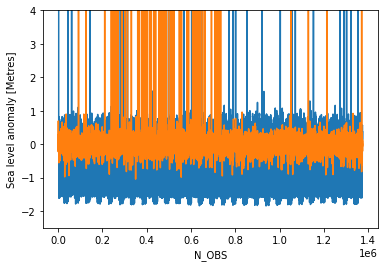

In [20]:
t1=0
t2=NTOT
dataset['SLA_SSH'][t1:t2].plot()
dataset['SLA_OBS'][t1:t2].plot()
plt.ylim(-2.5,4)

## Zoom on a shorter period

(-2.5, 4.0)

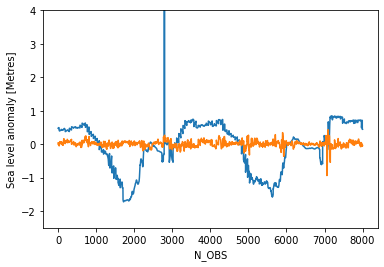

In [15]:
t1=42000
t2=50000
dataset['SLA_SSH'][t1:t2].plot()
dataset['SLA_OBS'][t1:t2].plot()
plt.ylim(-2.5,4)

## PLOT MAP WITH ALL DATA FROM OBS variable

In [51]:
t1=0
t2=NTOT

# read corresponding lat, lon and variable
lon = dataset['LONGITUDE'][t1:t2]
lat = dataset['LATITUDE'][t1:t2]

obs = dataset['SLA_OBS'][t1:t2]
qcflag = dataset['SLA_QC'][t1:t2]


<ipython-input-23-6de9c500503f>:88: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('#585858')


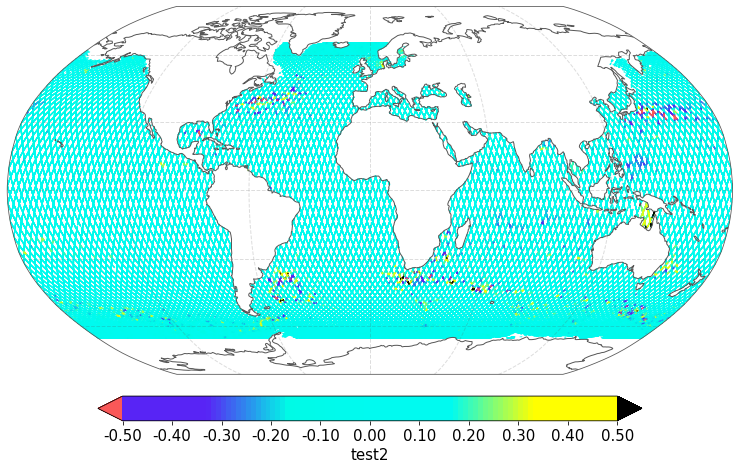

In [25]:
plto = "ALL OBS (no flag)"


#------ PLOT PARAMETERS ---------------
# colormap
cm_base=my_cmap  

# min/max values
vmin=-0.5
vmax=0.5
Nincr=100

# central longitude (for global map)
loncentr=180

# plot title and output file title
plti="test"
labelplt= "test2"

#create fig
fig1 = plt.figure(figsize=([13,10]),facecolor='white')

# plot data 
css =  plotmapSCATT(fig1,obs,lon,lat,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,obsflag=100,xlim=(-100,20),ylim=(-35,70) ,plto=plto,glo=True,coastL=True,coastC=False,su='#FA5858',so='k') #, 

plt.show()

# Save fig in png, resolution dpi
#fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#
plt.close(fig1) 

## ALL VALUES OVER 10 (wrong values?)

<ipython-input-23-6de9c500503f>:88: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('#585858')


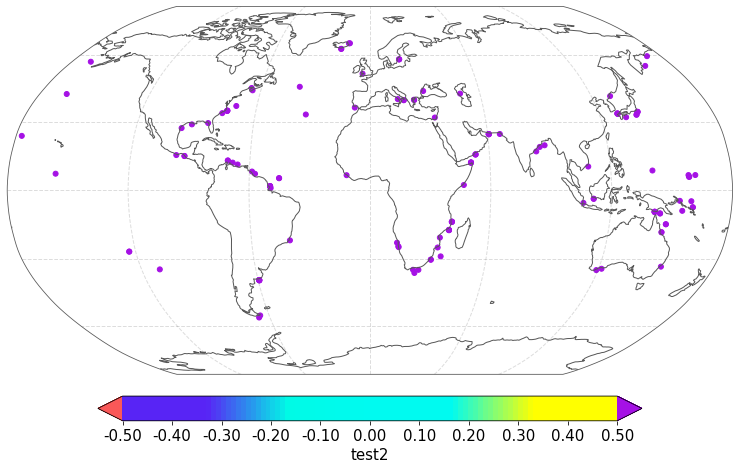

In [26]:
plto = "ALL OBS (no flag)"


#------ PLOT PARAMETERS ---------------
# colormap
cm_base=my_cmap  

# min/max values
vmin=-0.5
vmax=0.5
Nincr=100

# central longitude (for global map)
loncentr=180

# plot title and output file title
plti="test"
labelplt= "test2"

#create fig
fig1 = plt.figure(figsize=([13,10]),facecolor='white')

# plot data 
css =  plotmapSCATT(fig1,obs,lon,lat,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,obsflag=0,xlim=(-100,20),ylim=(-35,70) ,plto=plto,glo=True,coastL=True,coastC=False,su='#FA5858',so='#a511e5') #, 

plt.show()

# Save fig in png, resolution dpi
#fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#
plt.close(fig1) 

## ALL Values when SLA_QC flag is above 1 (1 seems to be the flag for OK values)

<ipython-input-37-f419d7d815bb>:88: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  ax.outline_patch.set_edgecolor('#585858')
/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1546: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  result = matplotlib.axes.Axes.scatter(self, *args, **kwargs)


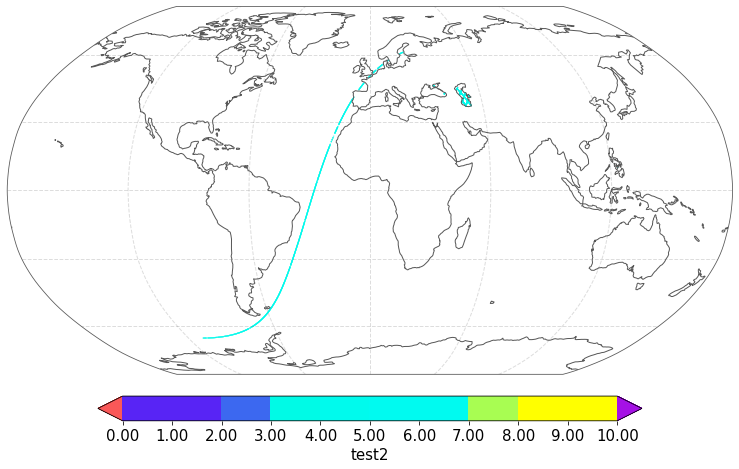

In [52]:
plto = "ALL values when flag is strictly above 1)"


#------ PLOT PARAMETERS ---------------
# colormap
cm_base=my_cmap  

# min/max values
vmin=0
vmax=10
Nincr=10

# central longitude (for global map)
loncentr=180

# plot title and output file title
plti="test"
labelplt= "test2"

#create fig
fig1 = plt.figure(figsize=([13,10]),facecolor='white')

# plot data 
css =  plotmapSCATT(fig1,qcflag,lon,lat,qcflag,cm_base=cm_base,vmin=vmin,vmax=vmax,Nincr=Nincr,obsflag=2,xlim=(-100,20),ylim=(-35,70) ,plto=plto,glo=True,coastL=True,coastC=False,su='#FA5858',so='#a511e5') #, 

plt.show()

# Save fig in png, resolution dpi
#fig1.savefig(diro+"/"+plto+'.png', facecolor=fig1.get_facecolor(), edgecolor='none',dpi=dpifig,bbox_inches='tight', pad_inches=0)#
plt.close(fig1) 